# generate polarized graph with different edges' probabilities

## graph 1: high prob. in one group and low prob. in other group, edges in middle use prob.=0.5

## graph 2: shuffle high and low prob. and assign 

## two graphs with completely same graph structure, and completely same edge prob. distribution

In [2]:
import Generator
import importlib
importlib.reload(Generator)
import load_graph
importlib.reload(load_graph)

<module 'load_graph' from '/Users/xinsh758/Documents/academic/evaluation/Evaluation/load_graph.py'>

## graph 1


In [ ]:
# generate graph
path='//Users//xinsh758//Documents//academic//evaluation//Evaluation//datasets//l50_k2_p0.18_polarized_graph//'
l=50
# p=.3 break the graph structure, make more edges between two groups
#p_=0.3
p_=0.18

k=2

g=Generator.evolving(k,l,p_)

       
        

In [26]:
import networkx as nx
import random
group1=0
group2=0
group3=0

path='//Users//xinsh758//Documents//academic//evaluation//Evaluation//datasets//l50_k2_p0.18_polarized_graph//'
polarizedG_order=nx.Graph()
wei=[]
# store prob. generated here, and use in graph 2 after shuffle
prob=[]
for i in list(g.edges):
    l1=[]
    
    if i[0]<50 and i[1]<50:
        group1+=1
        l1.append(i[0])
        l1.append(i[1])
        p=random.uniform(0,0.1)
        l1.append(p)
        prob.append(p)

    if i[0]>=50 and i[1]>=50:
        group2+=1
        l1.append(i[0])
        l1.append(i[1])
        p=random.uniform(0.9,1)
        l1.append(p)
        prob.append(p)
    if (i[0]<50 and i[1]>=50) or (i[0]>=50 and i[1]<50):
        group3+=1
        l1.append(i[0])
        l1.append(i[1])
        l1.append(0.5)
        prob.append(0.5)
    wei.append(l1)

polarizedG_order.add_weighted_edges_from(wei)
  

## saving grpah

In [28]:

filename='l50_k2_p0.18_polarized_ordered_graph.txt'
load_graph.loading_g(k,l,p_,polarizedG_order,path+filename)

## graph 2

In [29]:
random.shuffle(prob)
wei2=[]
j=0
for i in list(g.edges):
    l=[]
    l.append(i[0])
    l.append(i[1])
    l.append(prob[j])
    j+=1
    wei2.append(l)
polarizedG_unorder=nx.Graph()
polarizedG_unorder.add_weighted_edges_from(wei2)

## saving graph

In [30]:

filename='l50_k2_p0.18_polarized_unordered_graph.txt'
load_graph.loading_g(k,l,p_,polarizedG_unorder,path+filename)

# small size

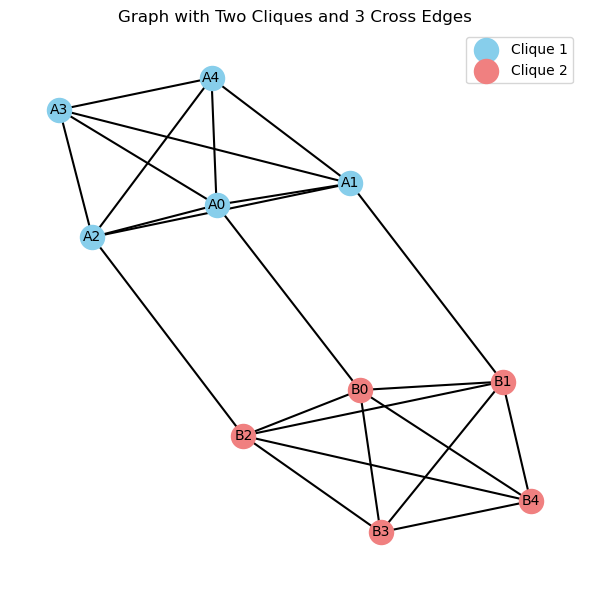

In [19]:
import networkx as nx
import matplotlib.pyplot as plt

# 创建空图
G = nx.Graph()

# 创建两个clique，每个5个节点
clique1 = [f'A{i}' for i in range(5)]
clique2 = [f'B{i}' for i in range(5)]

# 添加clique内边
G.add_nodes_from(clique1 + clique2)
G.add_edges_from([(u, v) for i, u in enumerate(clique1) for v in clique1[i+1:]])
G.add_edges_from([(u, v) for i, u in enumerate(clique2) for v in clique2[i+1:]])

# 添加 clique 之间的 3 条边（手动指定或随机）
G.add_edges_from([
    (clique1[0], clique2[0]),
    (clique1[1], clique2[1]),
    (clique1[2], clique2[2]),
])

# 可视化
plt.figure(figsize=(6, 6))
pos = nx.spring_layout(G, seed=42)

# 分颜色画两个clique
nx.draw_networkx_nodes(G, pos, nodelist=clique1, node_color='skyblue', label='Clique 1')
nx.draw_networkx_nodes(G, pos, nodelist=clique2, node_color='lightcoral', label='Clique 2')
nx.draw_networkx_edges(G, pos, width=1.5)
nx.draw_networkx_labels(G, pos, font_size=10)

plt.title('Graph with Two Cliques and 3 Cross Edges')
plt.axis('off')
plt.legend()
plt.tight_layout()
plt.show()
